## Machine Learning From Scratch
This notebook implements linear and logistic regression using Python and NumPy, without using scikit-learn. It demonstrates how to calculate the cost function, apply gradient descent, and make predictions. This project is part of my exploration of machine learning fundamentals.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp

<h3>Univariate Linear Regression</h3>

This code demonstrates my initial use of NumPy to design a simple, univariate linear regression model for some trial data.

In [16]:
# Gradient descent to find w, b
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([30, 35, 40, 45, 50, 58, 62, 68, 72, 80])
m = X.shape[0]
w = 0
b = 0
a = .00001
iters = 1000000
for i in range(iters):
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f = w * X[i] + b
        dj_dw += (f - y[i])*X[i]
        dj_db += (f - y[i])
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    w = w - a * dj_dw
    b = b - a * dj_db

print(f"The linear regression parameters are: (w:{w}, b:{b}).")


The linear regression parameters are: (w:5.898520851675613, b:20.979998385034285).


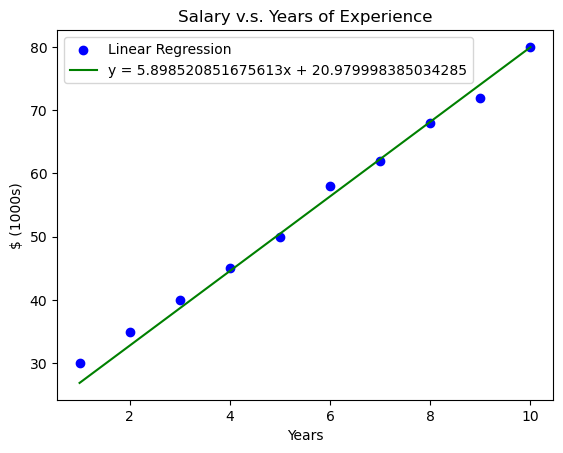

In [17]:
# Plot of Salary v.s. Years of Experience
plt.scatter(X, y, color='blue', label='Linear Regression')

y_custom = w * X + b

plt.plot(X, y_custom, color='green', label=f'y = {w}x + {b}')

plt.xlabel('Years')
plt.ylabel('$ (1000s)')
plt.title('Salary v.s. Years of Experience')
plt.legend()

plt.show()

<h3>Multiple Linear Regression</h3>

The following code explores multiple linear regression techniques using trial data.

<h4>Data Scaled Using Max Values</h4>

In [18]:
# Gradient descent to find w vector, b
X = np.array([
    [1500, 3, 20],
    [1700, 3, 15],
    [1300, 2, 30],
    [1600, 4, 10],
    [1800, 4, 5],
    [1450, 3, 25],
    [1550, 2, 20],
    [1750, 3, 12],
    [1400, 2, 28],
    [1650, 4, 8]
])
y = np.array([250, 285, 210, 290, 320, 235, 240, 300, 225, 295])

# The scaling here is: (x)/(max of x)
X_scaled = X * (1/X.max(axis=0))
y_scaled = y * (1/y.max())

w = np.zeros_like(X_scaled[0])
b = 0
m = X_scaled.shape[0]
a = .00001
iters = 1000000

for i in range(iters):
    dj_dw = np.zeros_like(X_scaled[0], dtype=float)
    dj_db = 0
    for i in range(X_scaled.shape[0]):
        f = np.dot(w, X_scaled[i]) + b
        dj_dw += (f - y_scaled[i])*X_scaled[i]
        dj_db += (f - y_scaled[i])
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    w = w - a * dj_dw
    b = b - a * dj_db
for i in range(w.shape[0]):
    print(f"The linear regression parameters are: w{i+1}: {w[i]:8.7f}")
print(f"The linear regression parameters are: b: {b:10.7f}")

The linear regression parameters are: w1: 0.3223495
The linear regression parameters are: w2: 0.3100263
The linear regression parameters are: w3: 0.0124354
The linear regression parameters are: b:  0.3073281


In [19]:
# Predicted Values (y-hat) v.s. Actual Values
for i in range(X_scaled.shape[0]):
    y_hat = 0
    for j in range(X_scaled.shape[1]):
        y_hat += w[j] * X_scaled[i][j]
    y_hat += b
    y_hat *= y.max()
    print(f"Predicted: {y_hat} v.s. Actual: {y[i]}")

Predicted: 261.3640434926749 v.s. Actual: 250
Predicted: 272.16213591226506 v.s. Actual: 285
Predicted: 226.42706809496886 v.s. Actual: 210
Predicted: 290.5703616414632 v.s. Actual: 290
Predicted: 301.3684540610534 v.s. Actual: 320
Predicted: 259.1619369464616 v.s. Actual: 235
Predicted: 239.4272670607723 v.s. Actual: 240
Predicted: 274.62953128977665 v.s. Actual: 300
Predicted: 231.89243651258846 v.s. Actual: 225
Predicted: 293.17040143462395 v.s. Actual: 295


<h4>Data Scaled Using Mean Normalization With Range Scaling (Zero-Centered)</h4>

In [20]:
# Gradient descent to find w vector, b
X = np.array([
    [1500, 3, 20],
    [1700, 3, 15],
    [1300, 2, 30],
    [1600, 4, 10],
    [1800, 4, 5],
    [1450, 3, 25],
    [1550, 2, 20],
    [1750, 3, 12],
    [1400, 2, 28],
    [1650, 4, 8]
])
y = np.array([250, 285, 210, 290, 320, 235, 240, 300, 225, 295])

# The scaling here is: (x - xbar)/(range of x)
X_scaled = (X - X.mean(axis=0))/(X.ptp(axis=0))
y_scaled = (y - y.mean())/(y.ptp())

w = np.zeros_like(X_scaled[0])
b = 0
m = X_scaled.shape[0]
a = .00001
iters = 1000000

for i in range(iters):
    dj_dw = np.zeros_like(X_scaled[0], dtype=float)
    dj_db = 0
    for i in range(X_scaled.shape[0]):
        f = np.dot(w, X_scaled[i]) + b
        dj_dw += (f - y_scaled[i])*X_scaled[i]
        dj_db += (f - y_scaled[i])
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    w = w - a * dj_dw
    b = b - a * dj_db
for i in range(w.shape[0]):
    print(f"The linear regression parameters are: w{i+1}: {w[i]:8.7f}")
print(f"The linear regression parameters are: b: {b:10.7f}")

The linear regression parameters are: w1: 0.3362517
The linear regression parameters are: w2: 0.2795986
The linear regression parameters are: w3: -0.3296428
The linear regression parameters are: b: -0.0000000


In [21]:
# Predicted Values (y-hat) v.s. Actual Values
y_predicted = np.dot(X_scaled, w) + b
y_pred = (y_predicted * y.ptp()) + y.mean()
for ypred, yt in zip(y_pred,y):
    print(f"Predicted: {ypred} v.s. Actual: {yt}")

Predicted: 255.90556690852324 v.s. Actual: 250
Predicted: 277.95278454856225 v.s. Actual: 285
Predicted: 211.22828698409552 v.s. Actual: 210
Predicted: 293.1853088483607 v.s. Actual: 290
Predicted: 315.2325264883997 v.s. Actual: 320
Predicted: 244.95465624536962 v.s. Actual: 235
Predicted: 244.22641528728815 v.s. Actual: 240
Predicted: 286.00283854337243 v.s. Actual: 300
Predicted: 221.52668163702918 v.s. Actual: 225
Predicted: 299.7849345089992 v.s. Actual: 295


<h4>Data Scaled Using Z-Score Normalization (Zero-Centered)</h4>

In [22]:
# Gradient descent to find w vector, b
X = np.array([
    [1500, 3, 20],
    [1700, 3, 15],
    [1300, 2, 30],
    [1600, 4, 10],
    [1800, 4, 5],
    [1450, 3, 25],
    [1550, 2, 20],
    [1750, 3, 12],
    [1400, 2, 28],
    [1650, 4, 8]
])
y = np.array([250, 285, 210, 290, 320, 235, 240, 300, 225, 295])

# The scaling here is (x - xbar)/(st.dev of x)
X_scaled = (X - X.mean(axis=0))/(X.std(axis=0))
y_scaled = (y - y.mean())/(y.std())

w = np.zeros_like(X_scaled[0])
b = 0
m = X_scaled.shape[0]
a = .00001
iters = 1000000

for i in range(iters):
    dj_dw = np.zeros_like(X_scaled[0], dtype=float)
    dj_db = 0
    for i in range(X_scaled.shape[0]):
        f = np.dot(w, X_scaled[i]) + b
        dj_dw += (f - y_scaled[i])*X_scaled[i]
        dj_db += (f - y_scaled[i])
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    w = w - a * dj_dw
    b = b - a * dj_db
for i in range(w.shape[0]):
    print(f"The linear regression parameters are: w{i+1}: {w[i]:8.7f}")
print(f"The linear regression parameters are: b: {b:10.7f}")

The linear regression parameters are: w1: 0.4979319
The linear regression parameters are: w2: 0.2002077
The linear regression parameters are: w3: -0.3471520
The linear regression parameters are: b: -0.0000000


In [23]:
# Predicted Values (y-hat) v.s. Actual Values
y_predicted = np.dot(X_scaled, w) + b
y_pred = (y_predicted * y.std()) + y.mean()
for ypred, yt in zip(y_pred,y):
    print(f"Predicted: {ypred} v.s. Actual: {yt}")

Predicted: 252.8314423219461 v.s. Actual: 250
Predicted: 283.5330540575833 v.s. Actual: 285
Predicted: 205.483944552485 v.s. Actual: 210
Predicted: 288.57285414616985 v.s. Actual: 290
Predicted: 319.27446588180703 v.s. Actual: 320
Predicted: 239.5389595041649 v.s. Actual: 235
Predicted: 249.4780391059034 v.s. Actual: 240
Predicted: 293.8297609372995 v.s. Actual: 300
Predicted: 220.08580643578736 v.s. Actual: 225
Predicted: 297.3716730568535 v.s. Actual: 295


<h3>Plotting J(𝑤⃗,b)</h3>

The following code explores the relationship between different data scaling techniques and the cost function J(𝑤⃗,b).

<h4>Using Z-Score Normalized Data</h4>

In [26]:
def get_j_multiple_regression(X,y,w,b):
    """
    Calculates the cost for
    a given w vector, b 
    X : 2D array (matrix),
    y : 1D array (vector),
    w : 1D array (vector),
    b : scalar
    RETURNS A FLOAT 
    """
    f = np.dot(X,w) + b
    cost = 0.
    for f_val, y_val in zip(f, y):
        cost += (f_val-y_val) ** 2
    cost /= (2*X.shape[0])
    return cost

In [27]:
# Gradient descent to find w vector, b
history = {}
X = np.array([
    [1500, 3, 20],
    [1700, 3, 15],
    [1300, 2, 30],
    [1600, 4, 10],
    [1800, 4, 5],
    [1450, 3, 25],
    [1550, 2, 20],
    [1750, 3, 12],
    [1400, 2, 28],
    [1650, 4, 8]
])
y = np.array([250, 285, 210, 290, 320, 235, 240, 300, 225, 295])

X_scaled = (X - X.mean(axis=0))/(X.std(axis=0))
y_scaled = (y - y.mean())/(y.std())

w = np.zeros_like(X_scaled[0])
b = 0
m = X_scaled.shape[0]
a = .00001
iters = 1000000

for it in range(iters):
    dj_dw = np.zeros_like(X_scaled[0], dtype=float)
    dj_db = 0
    for i in range(X_scaled.shape[0]):
        f = np.dot(w, X_scaled[i]) + b
        dj_dw += (f - y_scaled[i])*X_scaled[i]
        dj_db += (f - y_scaled[i])
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    w = w - a * dj_dw
    b = b - a * dj_db
    if it % 5000 == 0:
        history[it] = get_j_multiple_regression(X_scaled, y_scaled, w, b)
if it == iters-1:
    history[it] = get_j_multiple_regression(X_scaled, y_scaled, w, b)

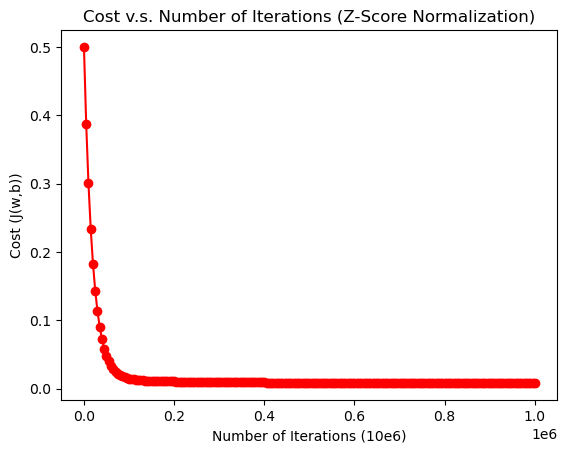

In [28]:
# Plot of Cost v.s. Number of Iterations
# Data scaling via Z-Score normalization
x = list(history.keys())
y = list(history.values())

fig, ax = plt.subplots()
ax.plot(x,y,marker="o", color= "r")
ax.set_title("Cost v.s. Number of Iterations (Z-Score Normalization)")
ax.set_xlabel("Number of Iterations (10e6)")
ax.set_ylabel("Cost (J(w,b))")
plt.show()

<h4>Using Mean Normalization</h4>

In [29]:
# Gradient descent to find w vector, b
history = {}
X = np.array([
    [1500, 3, 20],
    [1700, 3, 15],
    [1300, 2, 30],
    [1600, 4, 10],
    [1800, 4, 5],
    [1450, 3, 25],
    [1550, 2, 20],
    [1750, 3, 12],
    [1400, 2, 28],
    [1650, 4, 8]
])
y = np.array([250, 285, 210, 290, 320, 235, 240, 300, 225, 295])

X_scaled = (X - X.mean(axis=0))/(X.ptp(axis=0))
y_scaled = (y - y.mean())/(y.ptp())

w = np.zeros_like(X_scaled[0])
b = 0
m = X_scaled.shape[0]
a = .00001
iters = 1000000

for it in range(iters):
    dj_dw = np.zeros_like(X_scaled[0], dtype=float)
    dj_db = 0
    for i in range(X_scaled.shape[0]):
        f = np.dot(w, X_scaled[i]) + b
        dj_dw += (f - y_scaled[i])*X_scaled[i]
        dj_db += (f - y_scaled[i])
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    w = w - a * dj_dw
    b = b - a * dj_db
    if it % 5000 == 0:
        history[it] = get_j_multiple_regression(X_scaled, y_scaled, w, b)
if it == iters-1:
    history[it] = get_j_multiple_regression(X_scaled, y_scaled, w, b)

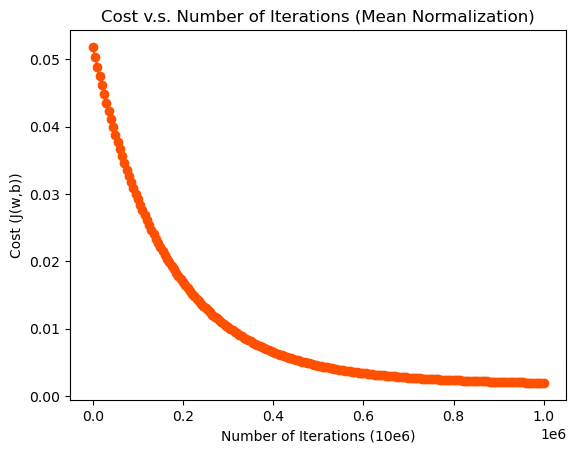

In [30]:
# Plot of Cost v.s. Number of Iterations
# Data scaling via mean normalization
x = list(history.keys())
y = list(history.values())

fig, ax = plt.subplots()
ax.plot(x,y,marker="o", color= "#FF5000")
ax.set_title("Cost v.s. Number of Iterations (Mean Normalization)")
ax.set_xlabel("Number of Iterations (10e6)")
ax.set_ylabel("Cost (J(w,b))")
plt.show()

<h4>Using Max Values</h4>

In [31]:
# Gradient descent to find w vector, b
history = {}
X = np.array([
    [1500, 3, 20],
    [1700, 3, 15],
    [1300, 2, 30],
    [1600, 4, 10],
    [1800, 4, 5],
    [1450, 3, 25],
    [1550, 2, 20],
    [1750, 3, 12],
    [1400, 2, 28],
    [1650, 4, 8]
])
y = np.array([250, 285, 210, 290, 320, 235, 240, 300, 225, 295])

X_scaled = X * (1/X.max(axis=0))
y_scaled = y * (1/y.max())

w = np.zeros_like(X_scaled[0])
b = 0
m = X_scaled.shape[0]
a = .00001
iters = 1000000

for it in range(iters):
    dj_dw = np.zeros_like(X_scaled[0], dtype=float)
    dj_db = 0
    for i in range(X_scaled.shape[0]):
        f = np.dot(w, X_scaled[i]) + b
        dj_dw += (f - y_scaled[i])*X_scaled[i]
        dj_db += (f - y_scaled[i])
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    w = w - a * dj_dw
    b = b - a * dj_db
    if it % 5000 == 0:
        history[it] = get_j_multiple_regression(X_scaled, y_scaled, w, b)
if it == iters-1:
    history[it] = get_j_multiple_regression(X_scaled, y_scaled, w, b)

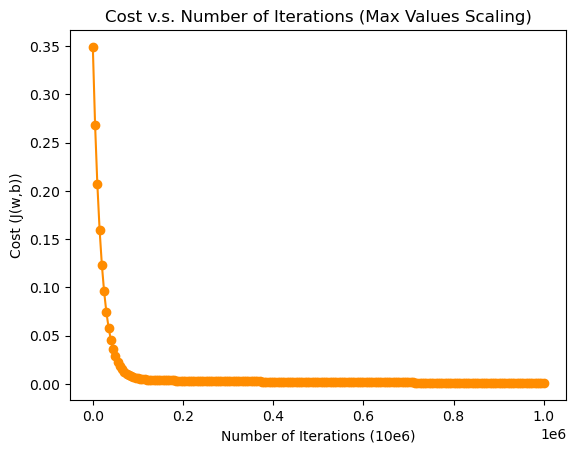

In [32]:
# Plot of Cost v.s. Number of Iterations
# Data scaling via max normalization
x = list(history.keys())
y = list(history.values())

fig, ax = plt.subplots()
ax.plot(x,y,marker="o", color= "darkorange")
ax.set_title("Cost v.s. Number of Iterations (Max Values Scaling)")
ax.set_xlabel("Number of Iterations (10e6)")
ax.set_ylabel("Cost (J(w,b))")
plt.show()

<h4>Refactored Multiple Linear Regression Using Vectorization</h4>

In [33]:
# Gradient descent to find w vector, b
history = {}
X = np.array([
    [1500, 3, 20],
    [1700, 3, 15],
    [1300, 2, 30],
    [1600, 4, 10],
    [1800, 4, 5],
    [1450, 3, 25],
    [1550, 2, 20],
    [1750, 3, 12],
    [1400, 2, 28],
    [1650, 4, 8]
])
y = np.array([250, 285, 210, 290, 320, 235, 240, 300, 225, 295])

X_scaled = (X - X.mean(axis=0))/(X.ptp(axis=0))
y_scaled = (y - y.mean())/(y.ptp())

w = np.zeros_like(X_scaled[0])
b = 0
m = X_scaled.shape[0]
a = .00001
iters = 1000000

for it in range(iters):
    dj_dw = np.zeros_like(X_scaled[0], dtype=float)
    dj_db = 0
    f = np.dot(X_scaled, w) + b
    errors = f - y_scaled
    dj_dw = (1/m) * np.dot(errors, X_scaled)
    dj_db = (1/m) * errors.sum()
    w -= a * dj_dw 
    b -= a * dj_db
    if it % 5000 == 0:
        history[it] = get_j_multiple_regression(X_scaled, y_scaled, w, b)
if it == iters-1:
    history[it] = get_j_multiple_regression(X_scaled, y_scaled, w, b)

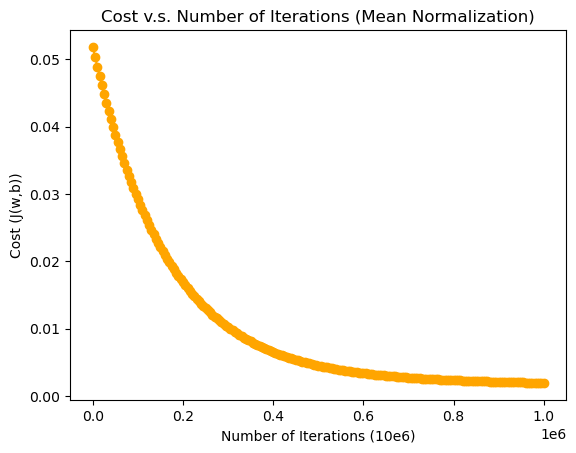

In [34]:
# Plot of Cost v.s. Number of Iterations
# Data scaling via mean normalization
x = list(history.keys())
y = list(history.values())

fig, ax = plt.subplots()
ax.plot(x,y,marker="o", color= "orange")
ax.set_title("Cost v.s. Number of Iterations (Mean Normalization)")
ax.set_xlabel("Number of Iterations (10e6)")
ax.set_ylabel("Cost (J(w,b))")
plt.show()

<h3>Logistic Regression</h3>

The following code explores logistic regression and classification problems.

In [35]:
def sigmoid(z):
    """
    Takes a scalar, nd.array
    and transforms it via
    the sigmoid function
    z : scalar, nd.array
    REQUIRES NUMPY AS NP
    RETURNS AN ARRAY
    """
    return 1/(1+np.exp(-z))

In [36]:
# x-values and y-values for sigmoid plot
inpt = np.arange(-10, 11)
outpt = sigmoid(inpt)
comp = np.hstack((inpt.reshape(-1, 1), outpt.reshape(-1, 1)))
print("Inputs v.s. Outputs")
print(comp)

Inputs v.s. Outputs
[[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]
 [ 1.00000000e+01  9.99954602e-01]]


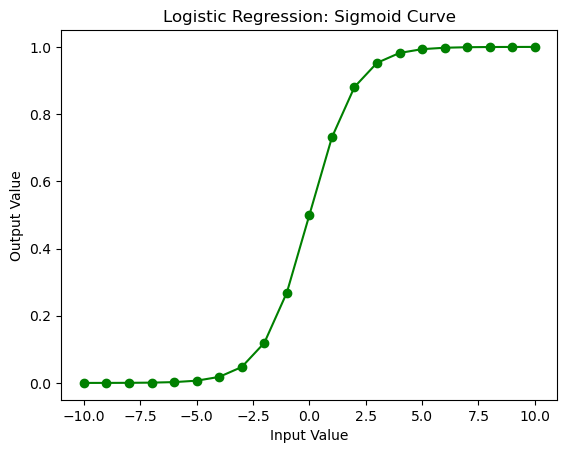

In [37]:
# Plot of a general sigmoid curve
fig, ax = plt.subplots()
ax.plot(inpt, outpt, marker="o", color= "green")
ax.set_xlabel("Input Value")
ax.set_ylabel("Output Value")
ax.set_title("Logistic Regression: Sigmoid Curve")
plt.show()

<h4>Logistic Cost Function</h4>

In [38]:
def logistic_cost(w, b, x, y):
    """
    Computes the logistic cost for
    a given model v.s. a training example
    w : Weights (ND Array)
    b : Bias (float)
    x : Inputs (ND Array)
    y : Outputs (1D Array)
    REQUIRES NUMPY AS NP,
    FROM MATH IMPORT LOG, EXP
    RETURNS A FLOAT
    """
    if not w.shape[0] == x.shape[1] or not x.shape[0] == y.shape[0]:
        raise ValueError("Data set size error!")
    l = 0
    m = y.shape[0]
    for i in range(m):
        z = np.dot(w, x[i]) + b
        g = 1/(1+exp(-z))
        g = max(min(g, 1 - 1e-15), 1e-15)
        y_i = y[i]

        l += -y_i * log(g) - (1-y_i) * log(1-g)
    
    l /= m
    
    return l
   

<h4>Gradient Descent For Logistic Regression</h4>

In [39]:
def find_dj_db_logistic(w, b, x, y):
    """
    Finds dj_db
    w : Weights (ND Array)
    b : Bias (float)
    x : Inputs (ND Array)
    y : Outputs (1D Array)
    REQUIRES NUMPY AS NP
    RETURNS A FLOAT
    """
    m = x.shape[0]
    dj_db = 0
    
    for row in range(m):
        z = np.dot(w,x[row]) + b
        g = 1/(1+exp(-z))
        g -= y[row]
        dj_db += g
    
    dj_db /= m
    
    return dj_db

In [40]:
def find_dj_dw_logistic(w, b, x, y):
    """
    Finds dj_dw
    w : Weights (ND Array)
    b : Bias (float)
    x : Inputs (ND Array)
    y : Outputs (1D Array)
    REQUIRES NUMPY AS NP
    RETURNS AN ND ARRAY
    """
    m = x.shape[0]
    dj_dw = np.zeros_like(w)

    for row in range(m):
        z = np.dot(w,x[row]) + b
        g = 1/(1+exp(-z))
        g -= y[row]
        g *= x[row]
        dj_dw += g

    dj_dw /= m

    return dj_dw
    

In [41]:
def gradient_descent_logistic(w, b, x, y, iters, a):
    """
    Uses gradient descent to determine
    parameters w, b that yield the lowest
    cost J(w,b); rescales via the feature array
    for improved model training using Z-Score
    Normalization
    w : Weights (ND Array)
    b : Bias (float)
    x : Inputs (ND Array)
    y : Outputs (1D Array)
    iters : # of iterations (int)
    a : Learning Rate (float)
    REQUIRES NUMPY AS NP,
    FROM MATH IMPORT EXP
    RETURNS w (ND Array), b (float)
    """
    if not w.shape[0] == x.shape[1] or not x.shape[0] == y.shape[0]:
        raise ValueError("Data set size error!")
    if not type(iters) == int or not iters > 0:
        raise ValueError("Number of iterations is invalid!")
    if not type(a) == float or not a > 0:
        raise ValueError("Learning rate is invalid!")
    
    x = (x-x.mean(axis=0))/x.std(axis=0)
    
    for i in range(iters):
        dj_db = find_dj_db_logistic(w, b, x, y)
        dj_dw = find_dj_dw_logistic(w, b, x, y)
        b -= a * dj_db
        w -= a * dj_dw
        if i % 1000 == 0:
            print(f"Iteration {i}, Loss: {logistic_cost(w, b, x, y):.4f}")
    
    print(f"The set of parameters (x was rescaled by Z-Score Normalization) are: (w: {list(w)}, b:{b})")
    
    return w, b
    
    

In [58]:
#Gradient Descent for Logistic Regression: test
x = np.array([
    [0.5, 1.5],
    [1.0, 1.2],
    [1.5, 0.8],
    [3.0, 3.5],
    [2.8, 3.0]
])
y = np.array([0, 0, 0, 1, 1])
w = np.zeros(x.shape[1])
b = 0.0 ; iters = 10000 ; a = .1
w, b = gradient_descent_logistic(w, b, x, y, iters, a)

Iteration 0, Loss: 0.6493
Iteration 1000, Loss: 0.0064
Iteration 2000, Loss: 0.0032
Iteration 3000, Loss: 0.0021
Iteration 4000, Loss: 0.0016
Iteration 5000, Loss: 0.0013
Iteration 6000, Loss: 0.0011
Iteration 7000, Loss: 0.0009
Iteration 8000, Loss: 0.0008
Iteration 9000, Loss: 0.0007
The set of parameters (x was rescaled by Z-Score Normalization) are: (w: [3.7807671035373374, 4.175263860193932], b:-1.1911175690208806)


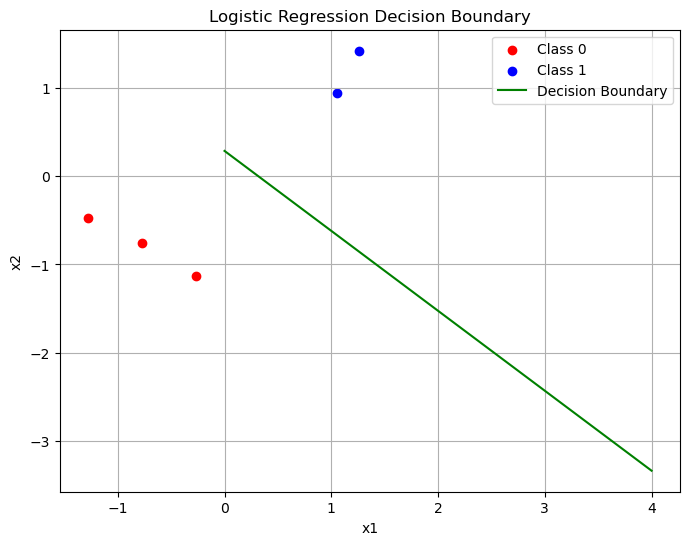

In [60]:
# Classification plot
x = (x-x.mean(axis=0))/x.std(axis=0)

plt.figure(figsize=(8, 6))
for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(x[i][0], x[i][1], color='blue', label='Class 1' if i == 3 else "")

x1_vals = np.linspace(0, 4, 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]
plt.plot(x1_vals, x2_vals, label='Decision Boundary', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
def predict(x, w, b):
    """
    Predicts the category
    for binary classifcation.
    w : Weights (ND Array)
    b : Bias (float)
    x : Inputs (ND Array)
    RETURNS A 1D ARRAY
    """ 
    preds = []
    x = (x-x.mean(axis=0))/x.std(axis=0)
    for i in range(x.shape[0]):
        z = np.dot(w, x[i]) + b
        g = 1 / (1 + exp(-z))
        preds.append(1 if g >= 0.5 else 0)
    return np.array(preds)

In [46]:
# Model predictions v.s. actual values
preds = predict(x, w, b)
print("Predictions:", preds)
print("Actual:", y)

Predictions: [0 0 0 1 1]
Actual: [0 0 0 1 1]


<h3>Regularization</h3>

The following code explores regularization to combat overfitting (high variance).

In [47]:
def find_dj_db_linear_regression(w, b, x, y):
    """
    Finds dj_db
    w : Weights (ND Array)
    b : Bias (float)
    x : Inputs (ND Array)
    y : Outputs (1D Array)
    iters : # of iterations (int)
    a : Learning Rate (float)
    REQUIRES NUMPY AS NP
    RETURNS A FLOAT
    """
    m = x.shape[0]
    dj_db = 0
    
    for row in range(m):
        f = np.dot(w,x[row]) + b
        dj_db += (f - y[row])

    dj_db /= m

    return dj_db
        

In [48]:
def find_dj_dw_linear_regression(w, b, x, y, reg_p):
    """
    Finds dj_dw
    w : Weights (ND Array)
    b : Bias (float)
    x : Inputs (ND Array)
    y : Outputs (1D Array)
    reg_p : Regularization Parameter (float)
    REQUIRES NUMPY AS NP
    RETURNS A FLOAT
    """
    m = x.shape[0]
    dj_dw = np.zeros_like(w)

    for row in range(m):
        f = np.dot(w, x[row]) + b
        f -= y[row]
        f *= x[row]
        dj_dw += f
        
    dj_dw /= m
    dj_dw += (reg_p * w)

    return dj_dw

In [51]:
def gradient_descent_linear_regression_with_regularization(w, b, x, y, iters, a, reg_p):
    """
    Uses gradient descent to determine
    parameters w, b that yield the lowest
    cost J(w,b); rescales via the feature array
    for improved model training using Z-Score
    Normalization
    w : Weights (ND Array)
    b : Bias (float)
    x : Inputs (ND Array)
    y : Outputs (1D Array)
    iters : # of iterations (int)
    a : Learning Rate (float)
    reg_p : Regularization Parameter (float)
    REQUIRES NUMPY AS NP,
    FROM MATH IMPORT EXP
    RETURNS w (ND Array), b (float)
    """
    if not w.shape[0] == x.shape[1] or not x.shape[0] == y.shape[0]:
        raise ValueError("Data set size error!")
    if not type(iters) == int or not iters > 0:
        raise ValueError("Number of iterations is invalid!")
    if not type(a) == float or not a > 0:
        raise ValueError("Learning rate is invalid!")
    if not type(reg_p) == float or not reg_p >= 0:
        raise ValueError("Regularization parameter is invalid!")
        
    x = (x-x.mean(axis=0))/x.std(axis=0)

    for i in range(iters):
        dj_db = find_dj_db_linear_regression(w, b, x, y)
        dj_dw = find_dj_dw_linear_regression(w, b, x, y, reg_p)
        b -= a * dj_db
        w -= a * dj_dw
    
    print(f"The set of parameters are (scaled using Z-Score Normalization): (w: {list(w)}, b:{b})")
    
    return w, b
    

In [61]:
# Gradient descent to find w vector, b
X = np.array([
    [1, 2],
    [2, 1],
    [3, 4],
    [4, 3],
    [5, 5],
    [6, 2],
    [2, 6],
    [7, 8],
    [8, 7],
    [9, 9]
])

y = np.array([12, 13, 22, 23, 30, 27, 23, 42, 43, 50])
w = np.zeros(X.shape[1])
b = 0 ; iters = 100000 ; a = .01 ; reg_p = 0.0001
w, b = gradient_descent_linear_regression_with_regularization(w, b, X, y, iters, a, reg_p)

The set of parameters are (scaled using Z-Score Normalization): (w: [7.827946450721075, 5.219283780201742], b:28.499999999999826)


In [53]:
def predict_linear_regression_with_regularization(w, b, x, y):
    """
    Computes the predicted
    value (y-hat) for given input
    values (x)
    w : Weights (ND Array)
    b : Bias (float)
    x : Inputs (ND Array)
    y : Outputs (1D Array)
    REQUIRES NUMPY AS NP
    RETURNS A 2D ARRAY
    """
    x = (x-x.mean(axis=0))/x.std(axis=0)
    m = x.shape[0]
    matrix = np.empty((0,2))
    
    for i in range(m):
        y_hat = np.dot(w, x[i]) + b
        y_actual = y[i]
        array = np.array([[y_hat, y_actual]])
        matrix = np.vstack((matrix, array))

    print("Predicted v.s. Actual")
    print(matrix)
    
    return matrix
        

In [54]:
result = predict_linear_regression_with_regularization(w, b, X, y)

Predicted v.s. Actual
[[12. 12.]
 [13. 13.]
 [22. 22.]
 [23. 23.]
 [30. 30.]
 [27. 27.]
 [23. 23.]
 [42. 42.]
 [43. 43.]
 [50. 50.]]


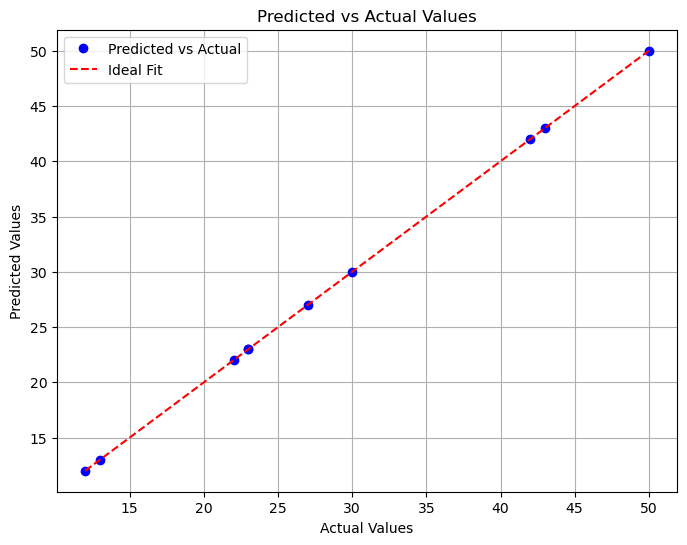

In [55]:
# Plot of predicted values v.s. actual values
predicted = result[:,0]
actual = result[:,1]

plt.figure(figsize=(8,6))
plt.plot(actual, predicted, 'bo', label='Predicted vs Actual')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()